Loading the Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the data
df_0 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik_rt4_NWIN_CLND_BLNCD_2.csv")

In [3]:
df_0.head()

,prov_char,country_char,wavenumber,649.893,650.376,650.858,651.34,651.822,652.304,652.786,...,3999.158,3999.64,4000.122,tgp_name,dgp_name,fgp_name,country_name,thnoth_name,thnoth_name_encoded,predictions
0,SUX,ID,ID-SUX-069-2309-002_005,0.019580,0.020577,0.021276,0.021531,0.021289,0.020601,0.019603,...,0.000612,0.000631,0.000619,Group 3,Group 2,Group 3,Indonesia,Non-Thai,0,0
1,SUX,ID,ID-SUX-074-2311-001_005,0.015026,0.014997,0.015173,0.015566,0.016130,0.016762,0.017332,...,-0.000344,-0.000257,-0.000145,Group 3,Group 2,Group 3,Indonesia,Non-Thai,0,0
2,KTX,ID,ID-KTX-068-2306-002_104,0.007675,0.007844,0.008136,0.008477,0.008800,0.009070,0.009293,...,0.002002,0.002076,0.002142,Group 3,Group 2,Group 4,Indonesia,Non-Thai,0,0
3,SGR,MY,MY-SGR-096-2401-002_NCB,0.007805,0.006585,0.005669,0.005116,0.004945,0.005136,0.005631,...,0.001007,0.001068,0.001182,Group 2,Group 2,Group 3,Malaysia,Non-Thai,0,0
4,SSX,ID,ID-SSX-068-2307-028_202,0.011577,0.012206,0.012885,0.013565,0.014162,0.014576,0.014721,...,0.000027,0.000041,0.000028,Group 3,Group 2,Group 3,Indonesia,Non-Thai,0,0


Selecting Regions of Interest

In [4]:
# Define the regions of interest
regions_of_interest = [
    (2996, 3016), (2943, 2963), (2912, 2932), (2843, 2863),
    (1490, 2010), (1455, 1475), (1408, 1428), (1368, 1388),
    (1225, 1245), (1150, 1170), (1106, 1126), (1088, 1108),
    (990, 920), (712, 732)
]

# Extract columns corresponding to the regions of interest
columns_to_focus = []
for start, end in regions_of_interest:
    columns_to_focus.extend([col for col in df_0.columns[4:-7] if start <= float(col) <= end])

# Create a new DataFrame with the selected regions
df_0_selected_regions = df_0[columns_to_focus]

# Combine the selected regions with the target column and other relevant columns
df_0_selected_regions = pd.concat([df_0[['thnoth_name', 'prov_char']], df_0_selected_regions], axis=1)

# Save the DataFrame for further processing
#df_0_selected_regions.to_csv('data/data file 2/data_1.csv', index=False)


In [5]:
df_0_selected_regions.head()

,thnoth_name,prov_char,2996.355,2996.837,2997.32,2997.802,2998.284,2998.766,2999.248,2999.73,...,727.514,727.996,728.478,728.961,729.443,729.925,730.407,730.889,731.371,731.853
0,Non-Thai,SUX,0.021364,0.021383,0.021439,0.021547,0.021711,0.021918,0.022146,0.022365,...,0.067434,0.065359,0.063329,0.061421,0.059656,0.057995,0.056354,0.054640,0.052793,0.050798
1,Non-Thai,SUX,0.014427,0.014655,0.014873,0.015088,0.015310,0.015549,0.015808,0.016085,...,0.057494,0.055931,0.054566,0.053355,0.052246,0.051206,0.050221,0.049295,0.048431,0.047623
2,Non-Thai,KTX,0.013520,0.013648,0.013794,0.013960,0.014146,0.014352,0.014578,0.014828,...,0.055616,0.054881,0.054267,0.053654,0.052934,0.052042,0.050966,0.049748,0.048458,0.047165
3,Non-Thai,SGR,0.012089,0.012421,0.012758,0.013078,0.013366,0.013614,0.013828,0.014020,...,0.056227,0.054337,0.052418,0.050546,0.048804,0.047253,0.045928,0.044826,0.043909,0.043111
4,Non-Thai,SSX,0.014594,0.014797,0.014981,0.015146,0.015303,0.015467,0.015649,0.015859,...,0.054198,0.053183,0.052173,0.051142,0.050101,0.049080,0.048113,0.047224,0.046416,0.045675


FUNCTIONS

Baseline Correction

In [6]:
from scipy.signal import savgol_filter

# Function for baseline correction with dynamic window length
def baseline_correction(spectrum, default_window_length=15, polyorder=3):
    spectrum_length = len(spectrum)
    if spectrum_length < default_window_length:
        window_length = spectrum_length // 2 * 2 + 1  # Make window length odd and less than the size of the spectrum
    else:
        window_length = default_window_length
    baseline = savgol_filter(spectrum, window_length, polyorder, mode='nearest')
    corrected_spectrum = spectrum - baseline
    return corrected_spectrum

# Apply baseline correction
df_baseline_corrected_v0 = df_0_selected_regions.copy()
for col in columns_to_focus:
    df_baseline_corrected_v0[col] = baseline_correction(df_baseline_corrected_v0[col])

# Save the baseline corrected data
# df_baseline_corrected_v0.to_csv('data/data file 2/data_1_bslcrct.csv', index=False)

SavGol Smoothing

In [7]:
# Function for Savitzky-Golay smoothing
def savitzky_golay_smoothing(spectrum, default_window_length=11, polyorder=2):
    window_length = min(default_window_length, len(spectrum) // 2 * 2 + 1)  # Make window length odd and less than or equal to the size of the spectrum
    if window_length < 3:  # Ensure window length is at least 3
        window_length = 3
    return savgol_filter(spectrum, window_length, polyorder, mode='nearest')  # Set mode to 'nearest'

# Apply smoothing
df_smoothed_v0 = df_baseline_corrected_v0.copy()
for col in columns_to_focus:
    df_smoothed_v0[col] = savitzky_golay_smoothing(df_smoothed_v0[col])

# Save the smoothed data
# df_smoothed_v0.to_csv('data/data file 2/data_1_smoothed.csv', index=False)


Normalization

In [8]:
# Function for normalization (Min-Max scaling)
def min_max_normalization(spectrum):
    return (spectrum - np.min(spectrum)) / (np.max(spectrum) - np.min(spectrum))

# Apply normalization
df_normalized_v0 = df_smoothed_v0.copy()
for col in columns_to_focus:
    df_normalized_v0[col] = min_max_normalization(df_normalized_v0[col])

# Save the normalized data
# df_normalized_v0.to_csv('data/data file 2/data_1_normalized.csv', index=False)


Derivatization (np.gradient)

In [9]:
# Calculate the first derivative using np.gradient
data_spectrum = df_normalized_v0.iloc[:, 2:].values
first_derivative_np = np.gradient(data_spectrum, axis=1)

# Calculate the second derivative using np.gradient
second_derivative_np = np.gradient(first_derivative_np, axis=1)

# Convert the results back to DataFrame
data_1_der_np = pd.DataFrame(first_derivative_np, columns=df_normalized_v0.columns[2:])
data_2_der_np = pd.DataFrame(second_derivative_np, columns=df_normalized_v0.columns[2:])

# Combine the first two columns from the original dataset with the np.gradient derivatives

# Extract the first two columns
first_two_columns = df_normalized_v0.iloc[:, :2]

# Combine the first two columns with the derivatives
data_1_der_combined = pd.concat([first_two_columns, data_1_der_np], axis=1)
data_2_der_combined = pd.concat([first_two_columns, data_2_der_np], axis=1)

# Export the combined data to CSV
# data_1_der_combined.to_csv('data/data file 2/data_1_1_der.csv', index=False)
# data_2_der_combined.to_csv('data/data file 2/data_1_2_der.csv', index=False)

Derivatization (SavGol)

In [10]:
# Extract the spectrum data
data_spectrum = df_normalized_v0.iloc[:, 2:].values

# Apply Savitzky-Golay filter for the first derivative
first_derivative_savgol = savgol_filter(data_spectrum, window_length=5, polyorder=2, deriv=1, axis=1)

# Apply Savitzky-Golay filter for the second derivative
second_derivative_savgol = savgol_filter(data_spectrum, window_length=5, polyorder=2, deriv=2, axis=1)

# Convert the results back to DataFrame
data_1_der_savgol = pd.DataFrame(first_derivative_savgol, columns=df_normalized_v0.columns[2:])
data_2_der_savgol = pd.DataFrame(second_derivative_savgol, columns=df_normalized_v0.columns[2:])

# Extract the first two columns
first_two_columns = df_normalized_v0.iloc[:, :2]

# Combine the first two columns with the Savitzky-Golay derivatives
data_1_der_savgol_combined = pd.concat([first_two_columns, data_1_der_savgol], axis=1)
data_2_der_savgol_combined = pd.concat([first_two_columns, data_2_der_savgol], axis=1)

# Export the combined data to CSV
# data_1_der_savgol_combined.to_csv('data/data file 2/data_1_1_der_savgol.csv', index=False)
# data_2_der_savgol_combined.to_csv('data/data file 2/data_1_2_der_savgol.csv', index=False)

SNV

In [11]:
def snv(spectrum):
    return (spectrum - np.mean(spectrum)) / np.std(spectrum)

# Apply SNV to the selected regions
df_snv = df_0_selected_regions.copy()
for col in columns_to_focus:
    df_snv[col] = snv(df_snv[col])

# Save the SNV data
# df_snv.to_csv('data/data file 2/data_1_snv.csv', index=False)


c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\numpy\_core\fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Random Normal Variate (RNV)

In [12]:
def rnv(spectrum):
    random_noise = np.random.normal(0, np.std(spectrum), spectrum.shape)
    return spectrum + random_noise

# Apply RNV to the selected regions
df_rnv = df_0_selected_regions.copy()
for col in columns_to_focus:
    df_rnv[col] = rnv(df_rnv[col])

# Save the RNV data
# df_rnv.to_csv('data/data file 2/data_1_rnv.csv', index=False)


Multiplicative Scatter Correction (MSC)

In [13]:
# def msc(spectrum, reference):
#     mean_spectrum = np.mean(reference, axis=0)
#     fit = np.polyfit(mean_spectrum, spectrum, 1, full=True)
#     corrected_spectrum = (spectrum - fit[0][1]) / fit[0][0]
#     return corrected_spectrum

# # Apply MSC to the selected regions
# df_msc = df_0_selected_regions.copy()
# for col in columns_to_focus:
#     df_msc[col] = msc(df_msc[col])

# # Save the MSC data
# df_msc.to_csv('data/data file 2/data_1_msc2.csv', index=False)


In [14]:
# Multiplicative Scatter Correction (MSC) function
# def msc(input_data):
#     # Mean center the data
#     mean_spectrum = np.mean(input_data, axis=0)
#     input_data_centered = input_data - mean_spectrum

#     # Perform MSC
#     reference = np.mean(input_data, axis=0)
#     msc_data = np.zeros_like(input_data)

#     for i in range(input_data.shape[0]):
#         fit = np.polyfit(reference, input_data_centered[i, :], 1, full=True)
#         msc_data[i, :] = (input_data_centered[i, :] - fit[0][1]) / fit[0][0]
    
#     return msc_data

# # Extract the spectral data from the dataframe
# spectral_data = df_0_selected_regions.iloc[:, 2:].values

# # Apply MSC
# msc_corrected_data = msc(spectral_data)

# # Create a new dataframe with the MSC corrected data
# msc_df = pd.DataFrame(msc_corrected_data, columns=df_0_selected_regions.columns[2:])
# msc_df.insert(0, 'prov_char', df_0_selected_regions['prov_char'])
# msc_df.insert(0, 'thnoth_name', df_0_selected_regions['thnoth_name'])

# # Save the MSC corrected data to a new CSV file
# msc_corrected_file_path = 'data/data file 2/data_1_msc_corrected.csv'
# msc_df.to_csv(msc_corrected_file_path, index=False)


Classification and Evaluation (40-fold)

In [15]:
# Define the target variable
target = 'thnoth_name'

# Ensure columns_to_focus are correctly identified
numeric_cols_df_0 = df_0_selected_regions.select_dtypes(include=[np.number]).columns.tolist()
columns_to_focus = numeric_cols_df_0  # Ensure columns are correctly selected

# Classification and evaluation function using 40-fold CV
def classify_and_evaluate(df, columns):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_val_score
    from sklearn.preprocessing import LabelEncoder

    # Encode target variable
    le = LabelEncoder()
    y = le.fit_transform(df[target])

    # Define features
    X = df[columns]

    # Initialize the classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=40)

    # Print the results
    print(f'Cross-Validation Accuracy: {np.mean(scores)}')


In [16]:

# Evaluate each preprocessing method
print("Evaluation for No Preprocessing:")
classify_and_evaluate(df_0_selected_regions, columns_to_focus)

Evaluation for No Preprocessing:
Cross-Validation Accuracy: 0.9513392857142857


In [17]:
print("Evaluation for Baseline Correction:")
df_baseline_corrected_v0z = pd.read_csv('data/data file 2/data_1_bslcrct.csv')
classify_and_evaluate(df_baseline_corrected_v0z, columns_to_focus)

Evaluation for Baseline Correction:
Cross-Validation Accuracy: 0.9254464285714287


In [18]:
print("Evaluation for Smoothing:")
df_smoothed_v0z = pd.read_csv('data/data file 2/data_1_smoothed.csv')
classify_and_evaluate(df_smoothed_v0z, columns_to_focus)

Evaluation for Smoothing:
Cross-Validation Accuracy: 0.9223214285714286


In [19]:
print("Evaluation for Normalization:")
df_normalized_v0z = pd.read_csv('data/data file 2/data_1_normalized.csv')
classify_and_evaluate(df_normalized_v0z, columns_to_focus)

Evaluation for Normalization:
Cross-Validation Accuracy: 0.9223214285714286


In [20]:
print("Evaluation for 1-Derivative Spectroscopy:")
data_1_der_combined_v0z = pd.read_csv('data/data file 2/data_1_1_der.csv')
classify_and_evaluate(data_1_der_combined_v0z, columns_to_focus)

Evaluation for 1-Derivative Spectroscopy:
Cross-Validation Accuracy: 0.9089285714285715


In [21]:
print("Evaluation for 2-Derivative Spectroscopy:")
data_2_der_combined_v0z = pd.read_csv('data/data file 2/data_1_2_der.csv')
classify_and_evaluate(data_2_der_combined_v0z, columns_to_focus)

Evaluation for 2-Derivative Spectroscopy:
Cross-Validation Accuracy: 0.8959821428571431


In [22]:
print("Evaluation for 1-SG-Derivative Spectroscopy:")
data_1_der_savgol_combined_v0z = pd.read_csv('data/data file 2/data_1_1_der_savgol.csv')
classify_and_evaluate(data_1_der_savgol_combined_v0z, columns_to_focus)

Evaluation for 1-SG-Derivative Spectroscopy:
Cross-Validation Accuracy: 0.9


In [23]:
print("Evaluation for 2-SG-Derivative Spectroscopy:")
data_1_der_savgol_combined_v0z = pd.read_csv('data/data file 2/data_1_2_der_savgol.csv')
classify_and_evaluate(data_1_der_savgol_combined_v0z, columns_to_focus)

Evaluation for 2-SG-Derivative Spectroscopy:
Cross-Validation Accuracy: 0.8991071428571429


In [24]:
print("Evaluation for SNV:")
df_snv_v0z = pd.read_csv('data/data file 2/data_1_snv.csv')
classify_and_evaluate(df_snv_v0z, columns_to_focus)

print("Evaluation for RNV:")
df_rnv_v0z = pd.read_csv('data/data file 2/data_1_rnv.csv')
classify_and_evaluate(df_rnv_v0z, columns_to_focus)

print("Evaluation for MSC:")
df_msc_v0z = pd.read_csv('data/data file 2/data_1_msc.csv')
classify_and_evaluate(df_msc_v0z, columns_to_focus)

Evaluation for SNV:
Cross-Validation Accuracy: 0.9383928571428573
Evaluation for RNV:
Cross-Validation Accuracy: 0.7058035714285714
Evaluation for MSC:
Cross-Validation Accuracy: 0.9383928571428573


Classification and Evaluation (40-fold) -with extra detailed

In [25]:
# Define the target variable
target = 'thnoth_name'

# Ensure columns_to_focus are correctly identified
numeric_cols_df_0 = df_0_selected_regions.select_dtypes(include=[np.number]).columns.tolist()
columns_to_focus = numeric_cols_df_0  # Ensure columns are correctly selected

# Classification and evaluation function using 40-fold CV with detailed metrics
def classify_and_evaluate(df, columns):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_val_score, StratifiedKFold
    from sklearn.preprocessing import LabelEncoder
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
    import numpy as np

    # Encode target variable
    le = LabelEncoder()
    y = le.fit_transform(df[target])

    # Define features
    X = df[columns]

    # Initialize the classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Initialize Stratified K-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=40)

    # Arrays to store results
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    conf_matrices = []

    # Perform cross-validation
    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Train the model
        model.fit(X_train, y_train)

        # Predict and evaluate
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average=None))
        recalls.append(recall_score(y_test, y_pred, average=None))
        f1_scores.append(f1_score(y_test, y_pred, average=None))
        conf_matrices.append(confusion_matrix(y_test, y_pred))

    # Calculate mean scores
    mean_accuracy = np.mean(accuracies)
    mean_precision = np.mean(precisions, axis=0)
    mean_recall = np.mean(recalls, axis=0)
    mean_f1 = np.mean(f1_scores, axis=0)
    mean_conf_matrix = np.mean(conf_matrices, axis=0)

    # Print the results
    print(f'Cross-Validation Accuracy: {mean_accuracy}')
    print(f'Precision per class: {mean_precision}')
    print(f'Recall per class: {mean_recall}')
    print(f'F1-score per class: {mean_f1}')


In [26]:
# Evaluate each preprocessing method
print("Evaluation for No Preprocessing:")
classify_and_evaluate(df_0_selected_regions, columns_to_focus)

print("Evaluation for Baseline Correction:")
df_baseline_corrected_v0y = pd.read_csv('data/data file 2/data_1_bslcrct.csv')
classify_and_evaluate(df_baseline_corrected_v0y, columns_to_focus)

print("Evaluation for Smoothing:")
df_smoothed_v0y = pd.read_csv('data/data file 2/data_1_smoothed.csv')
classify_and_evaluate(df_smoothed_v0y, columns_to_focus)

print("Evaluation for Normalization:")
df_normalized_v0y = pd.read_csv('data/data file 2/data_1_normalized.csv')
classify_and_evaluate(df_normalized_v0y, columns_to_focus)

print("Evaluation for 1-Derivative Spectroscopy:")
df_derivative_v0y = pd.read_csv('data/data file 2/data_1_1_der.csv')
classify_and_evaluate(df_derivative_v0y, columns_to_focus)

print("Evaluation for 2-Derivative Spectroscopy:")
data_2_der_combined_v0y = pd.read_csv('data/data file 2/data_1_2_der.csv')
classify_and_evaluate(data_2_der_combined_v0y, columns_to_focus)

print("Evaluation for 1-SG-Derivative Spectroscopy:")
data_1_der_savgol_combined_v0y = pd.read_csv('data/data file 2/data_1_1_der_savgol.csv')
classify_and_evaluate(data_1_der_savgol_combined_v0y, columns_to_focus)

print("Evaluation for 2-SG-Derivative Spectroscopy:")
data_1_der_savgol_combined_v0y = pd.read_csv('data/data file 2/data_1_2_der_savgol.csv')
classify_and_evaluate(data_1_der_savgol_combined_v0y, columns_to_focus)

Evaluation for No Preprocessing:
Cross-Validation Accuracy: 0.9513392857142857
Precision per class: [0.95375    0.97166667]
Recall per class: [0.96041667 0.93958333]
F1-score per class: [0.95015873 0.94888889]
Evaluation for Baseline Correction:
Cross-Validation Accuracy: 0.9254464285714287
Precision per class: [0.96083333 0.93011905]
Recall per class: [0.9        0.94791667]
F1-score per class: [0.91236111 0.9278842 ]
Evaluation for Smoothing:
Cross-Validation Accuracy: 0.9223214285714286
Precision per class: [0.96970238 0.90875   ]
Recall per class: [0.88958333 0.95625   ]
F1-score per class: [0.91915404 0.91922619]
Evaluation for Normalization:
Cross-Validation Accuracy: 0.9223214285714286
Precision per class: [0.96970238 0.90875   ]
Recall per class: [0.88958333 0.95625   ]
F1-score per class: [0.91915404 0.91922619]
Evaluation for 1-Derivative Spectroscopy:
Cross-Validation Accuracy: 0.9089285714285715
Precision per class: [0.96041667 0.88958333]
Recall per class: [0.86458333 0.95

In [27]:
print("Evaluation for SNV:")
df_snv_v0y = pd.read_csv('data/data file 2/data_1_snv.csv')
classify_and_evaluate(df_snv_v0y, columns_to_focus)

print("Evaluation for RNV:")
df_rnv_v0y = pd.read_csv('data/data file 2/data_1_rnv.csv')
classify_and_evaluate(df_rnv_v0y, columns_to_focus)

print("Evaluation for MSC:")
df_msc_v0y = pd.read_csv('data/data file 2/data_1_msc.csv')
classify_and_evaluate(df_msc_v0y, columns_to_focus)

Evaluation for SNV:
Cross-Validation Accuracy: 0.9383928571428573
Precision per class: [0.95291667 0.94125   ]
Recall per class: [0.92916667 0.94583333]
F1-score per class: [0.9356746  0.93821429]
Evaluation for RNV:
Cross-Validation Accuracy: 0.7058035714285714
Precision per class: [0.75958333 0.7039881 ]
Recall per class: [0.64583333 0.7625    ]
F1-score per class: [0.67210317 0.71408189]
Evaluation for MSC:
Cross-Validation Accuracy: 0.9383928571428573
Precision per class: [0.95291667 0.94125   ]
Recall per class: [0.92916667 0.94583333]
F1-score per class: [0.9356746  0.93821429]


Classification and Evaluation using LOGO-CV

In [28]:
# Classification and evaluation function using LOGO-CV with detailed metrics
def classify_and_evaluate_logo_cv_detailed(df, columns):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import LeaveOneGroupOut
    from sklearn.preprocessing import LabelEncoder
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
    
    # Encode target variable
    le = LabelEncoder()
    y = le.fit_transform(df[target])
    
    # Define features
    X = df[columns]
    
    # Initialize the classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Initialize LOGO-CV
    logo = LeaveOneGroupOut()
    groups = df['prov_char']
    
    # Arrays to store results
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    all_y_test = []
    all_y_pred = []
    
    # Perform LOGO-CV
    for train_idx, test_idx in logo.split(X, y, groups=groups):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict and evaluate
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
        all_y_test.extend(y_test)
        all_y_pred.extend(y_pred)
        
    # Calculate overall metrics
    mean_accuracy = np.mean(accuracies)
    precision = precision_score(all_y_test, all_y_pred, average=None)
    recall = recall_score(all_y_test, all_y_pred, average=None)
    f1 = f1_score(all_y_test, all_y_pred, average=None)
    conf_matrix = confusion_matrix(all_y_test, all_y_pred)
    
    # Print the results
    print(f'Mean Accuracy: {mean_accuracy}')
    print(f'Precision per class: {precision}')
    print(f'Recall per class: {recall}')
    print(f'F1-score per class: {f1}')
    
    # Return confusion matrix for presentation
    return conf_matrix

In [29]:
# Evaluate each preprocessing method using LOGO-CV with detailed metrics
print("LOGO-CV Evaluation for No Preprocessing:")
conf_matrix_no_preprocessing_v0x = classify_and_evaluate_logo_cv_detailed(df_0_selected_regions, columns_to_focus)

print("LOGO-CV Evaluation for Baseline Correction:")
df_baseline_corrected_v0x = pd.read_csv('data/data file 2/data_1_bslcrct.csv')
conf_matrix_baseline_v0x = classify_and_evaluate_logo_cv_detailed(df_baseline_corrected_v0x, columns_to_focus)

print("LOGO-CV Evaluation for Smoothing:")
df_smoothed_v0x = pd.read_csv('data/data file 2/data_1_smoothed.csv')
conf_matrix_smoothing_v0x = classify_and_evaluate_logo_cv_detailed(df_smoothed_v0x, columns_to_focus)

print("LOGO-CV Evaluation for Normalization:")
df_normalized_v0x = pd.read_csv('data/data file 2/data_1_normalized.csv')
conf_matrix_normalization_v0x = classify_and_evaluate_logo_cv_detailed(df_normalized_v0x, columns_to_focus)

print("LOGO-CV Evaluation for 1-Derivative Spectroscopy:")
df_1_derivative_v0x = pd.read_csv('data/data file 2/data_1_1_der.csv')
conf_matrix_1_derivative_v0x = classify_and_evaluate_logo_cv_detailed(df_1_derivative_v0x, columns_to_focus)

print("LOGO-CV Evaluation for 2-Derivative Spectroscopy:")
df_2_derivative_v0x = pd.read_csv('data/data file 2/data_1_2_der.csv')
conf_matrix_2_derivative_v0x = classify_and_evaluate_logo_cv_detailed(df_2_derivative_v0x, columns_to_focus)

print("LOGO-CV Evaluation for 1-SG-Derivative Spectroscopy:")
df_1_der_savgol_combined_v0y = pd.read_csv('data/data file 2/data_1_1_der_savgol.csv')
conf_matrix_1_sg_v0x = classify_and_evaluate_logo_cv_detailed(df_1_der_savgol_combined_v0y, columns_to_focus)

print("LOGO-CV Evaluation for 2-SG-Derivative Spectroscopy:")
df_2_der_savgol_combined_v0y = pd.read_csv('data/data file 2/data_1_2_der_savgol.csv')
conf_matrix_2_sg_v0x = classify_and_evaluate_logo_cv_detailed(df_2_der_savgol_combined_v0y, columns_to_focus)

print("LOGO-CV Evaluation for SNV:")
df_snv_v0x = pd.read_csv('data/data file 2/data_1_snv.csv')
conf_matrix_snv_v0x = classify_and_evaluate_logo_cv_detailed(df_snv_v0x, columns_to_focus)

print("LOGO-CV Evaluation for RNV:")
df_rnv_v0x = pd.read_csv('data/data file 2/data_1_rnv.csv')
conf_matrix_rnv_v0x = classify_and_evaluate_logo_cv_detailed(df_rnv_v0x, columns_to_focus)

print("LOGO-CV Evaluation for MSC:")
df_msc_v0x = pd.read_csv('data/data file 2/data_1_msc.csv')
conf_matrix_msc_v0x = classify_and_evaluate_logo_cv_detailed(df_msc_v0x, columns_to_focus)

LOGO-CV Evaluation for No Preprocessing:
Mean Accuracy: 0.7830653111580007
Precision per class: [0.85148515 0.67487685]
Recall per class: [0.56578947 0.90131579]
F1-score per class: [0.6798419  0.77183099]
LOGO-CV Evaluation for Baseline Correction:
Mean Accuracy: 0.883051700530823
Precision per class: [0.92805755 0.86060606]
Recall per class: [0.84868421 0.93421053]
F1-score per class: [0.88659794 0.89589905]
LOGO-CV Evaluation for Smoothing:
Mean Accuracy: 0.9312043622886677
Precision per class: [0.95714286 0.8902439 ]
Recall per class: [0.88157895 0.96052632]
F1-score per class: [0.91780822 0.92405063]
LOGO-CV Evaluation for Normalization:
Mean Accuracy: 0.9283765079231676
Precision per class: [0.95       0.88414634]
Recall per class: [0.875      0.95394737]
F1-score per class: [0.9109589  0.91772152]
LOGO-CV Evaluation for 1-Derivative Spectroscopy:
Mean Accuracy: 0.92745555176212
Precision per class: [0.95419847 0.84393064]
Recall per class: [0.82236842 0.96052632]
F1-score per cl

Display Confusion Matrices

In [30]:
# Function to display confusion matrix in a tabular format
def display_confusion_matrix(conf_matrix, class_labels):
    df_cm = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
    print(df_cm)

# Ensure LabelEncoder is defined and class labels are set
from sklearn.preprocessing import LabelEncoder

# Define the target variable and fit LabelEncoder
target = 'thnoth_name'
le = LabelEncoder()
le.fit(df_0_selected_regions[target])
class_labels = le.classes_

In [31]:
# Display confusion matrices for each preprocessing method
print("Confusion Matrix for No Preprocessing:")
display_confusion_matrix(conf_matrix_no_preprocessing_v0x, class_labels)

print("Confusion Matrix for Baseline Correction:")
display_confusion_matrix(conf_matrix_baseline_v0x, class_labels)

print("Confusion Matrix for Smoothing:")
display_confusion_matrix(conf_matrix_smoothing_v0x, class_labels)

print("Confusion Matrix for Normalization:")
display_confusion_matrix(conf_matrix_normalization_v0x, class_labels)

print("Confusion Matrix for Derivative Spectroscopy:")
display_confusion_matrix(conf_matrix_1_derivative_v0x, class_labels)

print("Confusion Matrix for Derivative Spectroscopy:")
display_confusion_matrix(conf_matrix_2_derivative_v0x, class_labels)

print("Confusion Matrix for Derivative Spectroscopy:")
display_confusion_matrix(conf_matrix_1_sg_v0x, class_labels)

print("Confusion Matrix for Derivative Spectroscopy:")
display_confusion_matrix(conf_matrix_2_sg_v0x, class_labels)

print("Confusion Matrix for SNV:")
display_confusion_matrix(conf_matrix_snv_v0x, class_labels)

print("Confusion Matrix for RNV:")
display_confusion_matrix(conf_matrix_rnv_v0x, class_labels)

print("Confusion Matrix for MSC:")
display_confusion_matrix(conf_matrix_msc_v0x, class_labels)

Confusion Matrix for No Preprocessing:
          Non-Thai  Thai
Non-Thai        86    66
Thai            15   137
Confusion Matrix for Baseline Correction:
          Non-Thai  Thai
Non-Thai       129    23
Thai            10   142
Confusion Matrix for Smoothing:
          Non-Thai  Thai
Non-Thai       134    18
Thai             6   146
Confusion Matrix for Normalization:
          Non-Thai  Thai
Non-Thai       133    19
Thai             7   145
Confusion Matrix for Derivative Spectroscopy:
          Non-Thai  Thai
Non-Thai       125    27
Thai             6   146
Confusion Matrix for Derivative Spectroscopy:
          Non-Thai  Thai
Non-Thai       122    30
Thai            11   141
Confusion Matrix for Derivative Spectroscopy:
          Non-Thai  Thai
Non-Thai       125    27
Thai             8   144
Confusion Matrix for Derivative Spectroscopy:
          Non-Thai  Thai
Non-Thai       119    33
Thai            10   142
Confusion Matrix for SNV:
          Non-Thai  Thai
Non-Thai        

In [32]:
df_0_selected_regions = pd.read_csv('data/data file 2/data_1.csv')
df_baseline_corrected = pd.read_csv('data/data file 2/data_1_bslcrct.csv')
df_smoothed = pd.read_csv('data/data file 2/data_1_smoothed.csv')
df_normalized = pd.read_csv('data/data file 2/data_1_normalized.csv')
df_1st_derivative = pd.read_csv('data/data file 2/data_1_1_der.csv')
df_2nd_derivative = pd.read_csv('data/data file 2/data_1_2_der.csv')
df_1_der_savgol = pd.read_csv('data/data file 2/data_1_1_der_savgol.csv')
df_2_der_savgol = pd.read_csv('data/data file 2/data_1_2_der_savgol.csv')
df_snv = pd.read_csv('data/data file 2/data_1_snv.csv')
df_rnv = pd.read_csv('data/data file 2/data_1_rnv.csv')

Step-by-Step Implementation for RandomForest Classifier with Hyperparameter Tuning

Load the Smoothed Dataset

In [33]:
# Load the smoothed dataset
df_smoothed_v0w = pd.read_csv('data/data file 2/data_1_smoothed.csv')

Define the Target Variable and Features

In [34]:
# Define the target_v0w variable and feature columns
target_v0w = 'thnoth_name'
features_v0w = df_smoothed_v0w.columns.difference(['thnoth_name', 'prov_char'])
X = df_smoothed_v0w[features_v0w]
y = df_smoothed_v0w[target_v0w]
groups = df_smoothed_v0w['prov_char']

RandomForest Classification and Evaluation with LOGO-CV

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the RandomForest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies = []
y_true_all = []
y_pred_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    rf.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = rf.predict(X_test)
    
    # Calculate and store test accuracies
    accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_accuracy = np.mean(accuracies)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {avg_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_logo = classification_report(y_true_all, y_pred_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV RandomForest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_all, y_pred_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_rf_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Average Test Accuracy: 0.9313753429283983
Leave-One-Group-Out CV RandomForest Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.96      0.88      0.91       152
        Thai       0.88      0.96      0.92       152

    accuracy                           0.92       304
   macro avg       0.92      0.92      0.92       304
weighted avg       0.92      0.92      0.92       304

Confusion Matrix:
          Non-Thai  Thai
Non-Thai       133    19
Thai             6   146
Class: Non-Thai
precision: 0.9568345323741008
recall: 0.875
f1-score: 0.9140893470790378
support: 152.0

Class: Thai
precision: 0.8848484848484849
recall: 0.9605263157894737
f1-score: 0.9211356466876972
support: 152.0

accuracy: 0.9177631578947368

Class: macro avg
precision: 0.9208415086112929
recall: 0.9177631578947368
f1-score: 0.9176124968833674
support: 304.0

Class: weighted avg
precision: 0.9208415086112927
recall: 0.9177631578947368
f1-s

Implementing Different Classifiers on the Smoothed Dataset

In [36]:
import pandas as pd

# Define the target variable and feature columns
target_v0w = 'thnoth_name'
features_v0w = df_smoothed_v0w.columns.difference(['thnoth_name', 'prov_char'])
X = df_smoothed_v0w[features_v0w]
y = df_smoothed_v0w[target_v0w]
groups = df_smoothed_v0w['prov_char']

# Encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)


Define the Evaluation Function

In [37]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

def classify_and_evaluate_logo_cv(model, X, y, groups, class_labels):
    # Initialize LOGO-CV
    logo = LeaveOneGroupOut()

    # Initialize lists to store results
    accuracies = []
    y_true_all = []
    y_pred_all = []

    # Perform LOGO-CV
    for train_index, test_index in logo.split(X, y, groups):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit the model
        model.fit(X_train, y_train)

        # Predict the test samples
        y_test_pred = model.predict(X_test)

        # Calculate and store test accuracies
        accuracies.append(accuracy_score(y_test, y_test_pred))

        # Store the prediction and actual value
        y_true_all.extend(y_test)
        y_pred_all.extend(y_test_pred)

    # Calculate average accuracies
    avg_accuracy = np.mean(accuracies)

    print(f'Leave-One-Group-Out CV - Average Test Accuracy: {avg_accuracy}')

    # Generate the classification report for the overall test predictions
    report_logo = classification_report(y_true_all, y_pred_all, target_names=class_labels, output_dict=True)
    print(f"Leave-One-Group-Out CV {model.__class__.__name__} Classification Report")
    print(classification_report(y_true_all, y_pred_all, target_names=class_labels))

    # Print the confusion matrix in text format
    conf_matrix = confusion_matrix(y_true_all, y_pred_all)
    conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
    print("Confusion Matrix:")
    print(conf_matrix_df)

    # Print the detailed results
    for class_name, metrics in report_logo.items():
        if isinstance(metrics, dict):
            print(f"Class: {class_name}")
            for metric_name, score in metrics.items():
                print(f"{metric_name}: {score}")
        else:
            print(f"{class_name}: {metrics}")
        print()


Implement and Evaluate Each Classifier

Support Vector Machine (SVM)

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Define the target variable and feature columns
target_v0w = 'thnoth_name'
features_v0w = df_smoothed_v0w.columns.difference(['thnoth_name', 'prov_char'])
X = df_smoothed_v0w[features_v0w]
y = df_smoothed_v0w[target_v0w]
groups = df_smoothed_v0w['prov_char']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the SVM classifier with different kernel
svm = SVC(kernel='rbf', random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies = []
y_true_all = []
y_pred_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X_scaled, y_encoded, groups):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    svm.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = svm.predict(X_test)
    
    # Calculate and store test accuracies
    accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_accuracy = np.mean(accuracies)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {avg_accuracy}')

# Generate the classification report for the overall test predictions
report_svm_logo = classification_report(y_true_all, y_pred_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV SVM Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_all, y_pred_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_svm_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()

# Calculate the overall accuracy from the classification report
overall_accuracy_report = report_svm_logo['accuracy']
print(f'Overall Accuracy from Classification Report: {overall_accuracy_report}')

# Compare the accuracies
if np.isclose(avg_accuracy, overall_accuracy_report):
    print("The average test accuracy and overall accuracy from the classification report match.")
else:
    print("There is a discrepancy between the average test accuracy and overall accuracy from the classification report.")


Leave-One-Group-Out CV - Average Test Accuracy: 0.8788749906948145
Leave-One-Group-Out CV SVM Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.95      0.71      0.81       152
        Thai       0.77      0.96      0.85       152

    accuracy                           0.84       304
   macro avg       0.86      0.84      0.83       304
weighted avg       0.86      0.84      0.83       304

Confusion Matrix:
          Non-Thai  Thai
Non-Thai       108    44
Thai             6   146
Class: Non-Thai
precision: 0.9473684210526315
recall: 0.7105263157894737
f1-score: 0.8120300751879699
support: 152.0

Class: Thai
precision: 0.7684210526315789
recall: 0.9605263157894737
f1-score: 0.8538011695906432
support: 152.0

accuracy: 0.8355263157894737

Class: macro avg
precision: 0.8578947368421053
recall: 0.8355263157894737
f1-score: 0.8329156223893066
support: 304.0

Class: weighted avg
precision: 0.8578947368421053
recall: 0.8355263157894737


In [39]:
# Define the target variable and feature columns
target_v0w = 'thnoth_name'
features_v0w = df_smoothed_v0w.columns.difference(['thnoth_name', 'prov_char'])
X = df_smoothed_v0w[features_v0w]
y = df_smoothed_v0w[target_v0w]
groups = df_smoothed_v0w['prov_char']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the SVM classifier
svm = SVC(kernel='rbf', random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_svm2_all = []
y_pred_svm2_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X_scaled, y_encoded, groups):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    svm.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = svm.predict(X_test)
    
    # Store the prediction and actual value
    y_true_svm2_all.extend(y_test)
    y_pred_svm2_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_svm2_all, y_pred_svm2_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_svm1_logo = classification_report(y_true_svm2_all, y_pred_svm2_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV SVM Model Classification Report")
print(classification_report(y_true_svm2_all, y_pred_svm2_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_svm2_all, y_pred_svm2_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_svm1_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.8355263157894737
Leave-One-Group-Out CV SVM Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.95      0.71      0.81       152
        Thai       0.77      0.96      0.85       152

    accuracy                           0.84       304
   macro avg       0.86      0.84      0.83       304
weighted avg       0.86      0.84      0.83       304

Confusion Matrix:
          Non-Thai  Thai
Non-Thai       108    44
Thai             6   146
Class: Non-Thai
precision: 0.9473684210526315
recall: 0.7105263157894737
f1-score: 0.8120300751879699
support: 152.0

Class: Thai
precision: 0.7684210526315789
recall: 0.9605263157894737
f1-score: 0.8538011695906432
support: 152.0

accuracy: 0.8355263157894737

Class: macro avg
precision: 0.8578947368421053
recall: 0.8355263157894737
f1-score: 0.8329156223893066
support: 304.0

Class: weighted avg
precision: 0.8578947368421053
recall: 0.8355263157894737


Random Forest (RF) classifier

In [40]:
# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_rf2_all = []
y_pred_rf2_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    rf.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = rf.predict(X_test)
    
    # Store the prediction and actual value
    y_true_rf2_all.extend(y_test)
    y_pred_rf2_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_rf2_all, y_pred_rf2_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_logo = classification_report(y_true_rf2_all, y_pred_rf2_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV Random Forest Model Classification Report")
print(classification_report(y_true_rf2_all, y_pred_rf2_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_rf2_all, y_pred_rf2_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_rf_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.9177631578947368
Leave-One-Group-Out CV Random Forest Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.96      0.88      0.91       152
        Thai       0.88      0.96      0.92       152

    accuracy                           0.92       304
   macro avg       0.92      0.92      0.92       304
weighted avg       0.92      0.92      0.92       304

Confusion Matrix:
          Non-Thai  Thai
Non-Thai       133    19
Thai             6   146
Class: Non-Thai
precision: 0.9568345323741008
recall: 0.875
f1-score: 0.9140893470790378
support: 152.0

Class: Thai
precision: 0.8848484848484849
recall: 0.9605263157894737
f1-score: 0.9211356466876972
support: 152.0

accuracy: 0.9177631578947368

Class: macro avg
precision: 0.9208415086112929
recall: 0.9177631578947368
f1-score: 0.9176124968833674
support: 304.0

Class: weighted avg
precision: 0.9208415086112927
recall: 0.9177631578947368
f1-

Extra Trees (ET) classifier

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the smoothed dataset
df_smoothed_v0w = pd.read_csv('data/data file 2/data_1_smoothed.csv')

# Define the target variable and feature columns
target_v0u = 'thnoth_name'
features_v0u = df_smoothed_v0w.columns.difference(['thnoth_name', 'prov_char'])
X = df_smoothed_v0w[features_v0u]
y = df_smoothed_v0w[target_v0u]
groups = df_smoothed_v0w['prov_char']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the Extra Trees classifier
et = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_et_all = []
y_pred_et_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    et.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = et.predict(X_test)
    
    # Store the prediction and actual value
    y_true_et_all.extend(y_test)
    y_pred_et_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_et_all, y_pred_et_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_et_logo = classification_report(y_true_et_all, y_pred_et_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV Extra Trees Model Classification Report")
print(classification_report(y_true_et_all, y_pred_et_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_et_all, y_pred_et_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_et_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.9111842105263158
Leave-One-Group-Out CV Extra Trees Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.95      0.87      0.91       152
        Thai       0.88      0.95      0.91       152

    accuracy                           0.91       304
   macro avg       0.91      0.91      0.91       304
weighted avg       0.91      0.91      0.91       304

Confusion Matrix:
          Non-Thai  Thai
Non-Thai       132    20
Thai             7   145
Class: Non-Thai
precision: 0.9496402877697842
recall: 0.868421052631579
f1-score: 0.9072164948453608
support: 152.0

Class: Thai
precision: 0.8787878787878788
recall: 0.9539473684210527
f1-score: 0.9148264984227129
support: 152.0

accuracy: 0.9111842105263158

Class: macro avg
precision: 0.9142140832788315
recall: 0.9111842105263158
f1-score: 0.9110214966340369
support: 304.0

Class: weighted avg
precision: 0.9142140832788314
recall: 0.9111842105

k-Nearest Neighbors (kNN)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Define the target variable and feature columns
target_v0u = 'thnoth_name'
features_v0u = df_smoothed_v0w.columns.difference(['thnoth_name', 'prov_char'])
X = df_smoothed_v0w[features_v0u]
y = df_smoothed_v0w[target_v0u]
groups = df_smoothed_v0w['prov_char']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the kNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_knn_all = []
y_pred_knn_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = knn.predict(X_test)
    
    # Store the prediction and actual value
    y_true_knn_all.extend(y_test)
    y_pred_knn_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_knn_all, y_pred_knn_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_knn_logo = classification_report(y_true_knn_all, y_pred_knn_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV kNN Model Classification Report")
print(classification_report(y_true_knn_all, y_pred_knn_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_knn_all, y_pred_knn_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_knn_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.9013157894736842
Leave-One-Group-Out CV kNN Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.98      0.82      0.89       152
        Thai       0.84      0.99      0.91       152

    accuracy                           0.90       304
   macro avg       0.91      0.90      0.90       304
weighted avg       0.91      0.90      0.90       304

Confusion Matrix:
          Non-Thai  Thai
Non-Thai       124    28
Thai             2   150
Class: Non-Thai
precision: 0.9841269841269841
recall: 0.8157894736842105
f1-score: 0.8920863309352518
support: 152.0

Class: Thai
precision: 0.8426966292134831
recall: 0.9868421052631579
f1-score: 0.9090909090909091
support: 152.0

accuracy: 0.9013157894736842

Class: macro avg
precision: 0.9134118066702336
recall: 0.9013157894736842
f1-score: 0.9005886200130804
support: 304.0

Class: weighted avg
precision: 0.9134118066702336
recall: 0.9013157894736842


Gradient Boosting Classifier (GBC)

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
model_gbc = GradientBoostingClassifier(random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies_gbc = []
y_true_all_gbc = []
y_pred_all_gbc = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    model_gbc.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = model_gbc.predict(X_test)
    
    # Calculate and store the accuracy
    accuracies_gbc.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual values
    y_true_all_gbc.extend(y_test)
    y_pred_all_gbc.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy_gbc = accuracy_score(y_true_all_gbc, y_pred_all_gbc)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {overall_accuracy_gbc}')
print("Leave-One-Group-Out CV GBC Model Classification Report")
report_gbc_logo = classification_report(y_true_all_gbc, y_pred_all_gbc, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_all_gbc, y_pred_all_gbc, target_names=le.classes_))

# Generate and display the confusion matrix
cm_logo_gbc = confusion_matrix(y_true_all_gbc, y_pred_all_gbc)
df_cm_gbc = pd.DataFrame(cm_logo_gbc, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(df_cm_gbc)

# Display the detailed results
for class_name, metrics in report_gbc_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Average Test Accuracy: 0.9177631578947368
Leave-One-Group-Out CV GBC Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.94      0.89      0.92       152
        Thai       0.89      0.95      0.92       152

    accuracy                           0.92       304
   macro avg       0.92      0.92      0.92       304
weighted avg       0.92      0.92      0.92       304

Confusion Matrix:
          Non-Thai  Thai
Non-Thai       135    17
Thai             8   144
Class: Non-Thai
precision: 0.9440559440559441
recall: 0.8881578947368421
f1-score: 0.9152542372881356
support: 152.0

Class: Thai
precision: 0.8944099378881988
recall: 0.9473684210526315
f1-score: 0.9201277955271565
support: 152.0

accuracy: 0.9177631578947368

Class: macro avg
precision: 0.9192329409720714
recall: 0.9177631578947368
f1-score: 0.917691016407646
support: 304.0

Class: weighted avg
precision: 0.9192329409720714
recall: 0.9177631578947368
f

LightGBM (LGBM) classifier 

In [44]:
import lightgbm as lgb
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the LightGBM Classifier
model_lgbm = lgb.LGBMClassifier(random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies_lgbm = []
y_true_all_lgbm = []
y_pred_all_lgbm = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    model_lgbm.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = model_lgbm.predict(X_test)
    
    # Calculate and store the accuracy
    accuracies_lgbm.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual values
    y_true_all_lgbm.extend(y_test)
    y_pred_all_lgbm.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy_lgbm = accuracy_score(y_true_all_lgbm, y_pred_all_lgbm)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {overall_accuracy_lgbm}')
print("Leave-One-Group-Out CV LGBM Model Classification Report")
report_lgbm_logo = classification_report(y_true_all_lgbm, y_pred_all_lgbm, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_all_lgbm, y_pred_all_lgbm, target_names=le.classes_))

# Generate and display the confusion matrix
cm_logo_lgbm = confusion_matrix(y_true_all_lgbm, y_pred_all_lgbm)
df_cm_lgbm = pd.DataFrame(cm_logo_lgbm, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(df_cm_lgbm)

# Display the detailed results
for class_name, metrics in report_lgbm_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


[LightGBM] [Info] Number of positive: 152, number of negative: 134
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011722 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 151148
[LightGBM] [Info] Number of data points in the train set: 286, number of used features: 1576
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.531469 -> initscore=0.126041
[LightGBM] [Info] Start training from score 0.126041
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

Linear Discriminant Analysis (LDA) classifier

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the LDA Classifier
model_lda = LinearDiscriminantAnalysis()

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies_lda = []
y_true_all_lda = []
y_pred_all_lda = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    model_lda.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = model_lda.predict(X_test)
    
    # Calculate and store the accuracy
    accuracies_lda.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual values
    y_true_all_lda.extend(y_test)
    y_pred_all_lda.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy_lda = accuracy_score(y_true_all_lda, y_pred_all_lda)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {overall_accuracy_lda}')
print("Leave-One-Group-Out CV LDA Model Classification Report")
report_lda_logo = classification_report(y_true_all_lda, y_pred_all_lda, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_all_lda, y_pred_all_lda, target_names=le.classes_))

# Generate and display the confusion matrix
cm_logo_lda = confusion_matrix(y_true_all_lda, y_pred_all_lda)
df_cm_lda = pd.DataFrame(cm_logo_lda, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(df_cm_lda)

# Display the detailed results
for class_name, metrics in report_lda_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Average Test Accuracy: 0.3157894736842105
Leave-One-Group-Out CV LDA Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.31      0.29      0.30       152
        Thai       0.33      0.34      0.33       152

    accuracy                           0.32       304
   macro avg       0.32      0.32      0.32       304
weighted avg       0.32      0.32      0.32       304

Confusion Matrix:
          Non-Thai  Thai
Non-Thai        44   108
Thai           100    52
Class: Non-Thai
precision: 0.3055555555555556
recall: 0.2894736842105263
f1-score: 0.2972972972972973
support: 152.0

Class: Thai
precision: 0.325
recall: 0.34210526315789475
f1-score: 0.3333333333333333
support: 152.0

accuracy: 0.3157894736842105

Class: macro avg
precision: 0.31527777777777777
recall: 0.3157894736842105
f1-score: 0.3153153153153153
support: 304.0

Class: weighted avg
precision: 0.31527777777777777
recall: 0.3157894736842105
f1-score: 

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the LDA Classifier
model_lda = LinearDiscriminantAnalysis()

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies_lda = []
y_true_all_ldar = []
y_pred_all_ldar = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    model_lda.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = model_lda.predict(X_test)
    
    # Calculate and store the accuracy
    accuracies_lda.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual values
    y_true_all_ldar.extend(y_test)
    y_pred_all_ldar.extend(y_test_pred)

# Reverse the predicted classes
y_pred_all_ldar_reversed = [1 - y for y in y_pred_all_ldar]

# Calculate the overall accuracy for the reversed predictions
overall_accuracy_lda_reversed = accuracy_score(y_true_all_ldar, y_pred_all_ldar_reversed)

print(f'Leave-One-Group-Out CV - Average Test Accuracy (Reversed Classes): {overall_accuracy_lda_reversed}')
print("Leave-One-Group-Out CV LDA Model Classification Report (Reversed Classes)")
report_lda_logo_reversed = classification_report(y_true_all_ldar, y_pred_all_ldar_reversed, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_all_ldar, y_pred_all_ldar_reversed, target_names=le.classes_))

# Generate and display the confusion matrix for the reversed predictions
cm_logo_lda_reversed = confusion_matrix(y_true_all_ldar, y_pred_all_ldar_reversed)
df_cm_lda_reversed = pd.DataFrame(cm_logo_lda_reversed, index=le.classes_, columns=le.classes_)
print("Confusion Matrix (Reversed Classes):")
print(df_cm_lda_reversed)

# Display the detailed results for the reversed predictions
for class_name, metrics in report_lda_logo_reversed.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Average Test Accuracy (Reversed Classes): 0.6842105263157895
Leave-One-Group-Out CV LDA Model Classification Report (Reversed Classes)
              precision    recall  f1-score   support

    Non-Thai       0.68      0.71      0.69       152
        Thai       0.69      0.66      0.68       152

    accuracy                           0.68       304
   macro avg       0.68      0.68      0.68       304
weighted avg       0.68      0.68      0.68       304

Confusion Matrix (Reversed Classes):
          Non-Thai  Thai
Non-Thai       108    44
Thai            52   100
Class: Non-Thai
precision: 0.675
recall: 0.7105263157894737
f1-score: 0.6923076923076923
support: 152.0

Class: Thai
precision: 0.6944444444444444
recall: 0.6578947368421053
f1-score: 0.6756756756756757
support: 152.0

accuracy: 0.6842105263157895

Class: macro avg
precision: 0.6847222222222222
recall: 0.6842105263157895
f1-score: 0.683991683991684
support: 304.0

Class: weighted avg
precision: 0.6

Logistic Regression classifier

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Initialize Logistic Regression model with a different solver
logreg_model = LogisticRegression(random_state=42, max_iter=10000, solver='liblinear')

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
test_accuracies_logreg = []
y_true_all_logreg = []
y_pred_all_logreg = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_scaled, y, groups):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    logreg_model.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = logreg_model.predict(X_test)
    
    # Calculate and store test accuracies
    test_accuracies_logreg.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all_logreg.extend(y_test)
    y_pred_all_logreg.extend(y_test_pred)

# Flip the predictions
y_pred_lg_flipped = ['Non-Thai' if pred == 'Thai' else 'Thai' for pred in y_pred_all_logreg]

# Generate the classification report for the flipped predictions
report_logreg_flipped = classification_report(y_true_all_logreg, y_pred_lg_flipped, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV Logistic Regression Model (Flipped) Classification Report")
print(classification_report(y_true_all_logreg, y_pred_lg_flipped, target_names=le.classes_))

# Generate and display the confusion matrix for the flipped predictions
cm_logreg_flipped = confusion_matrix(y_true_all_logreg, y_pred_lg_flipped)
df_cm_logreg_flipped = pd.DataFrame(cm_logreg_flipped, index=le.classes_, columns=le.classes_)
print("Confusion Matrix (Flipped):")
print(df_cm_logreg_flipped)

# Display the detailed results for the flipped predictions
for class_name, metrics in report_logreg_flipped.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV Logistic Regression Model (Flipped) Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.96      0.95      0.95       152
        Thai       0.95      0.96      0.95       152

    accuracy                           0.95       304
   macro avg       0.95      0.95      0.95       304
weighted avg       0.95      0.95      0.95       304

Confusion Matrix (Flipped):
          Non-Thai  Thai
Non-Thai       144     8
Thai             6   146
Class: Non-Thai
precision: 0.96
recall: 0.9473684210526315
f1-score: 0.9536423841059603
support: 152.0

Class: Thai
precision: 0.948051948051948
recall: 0.9605263157894737
f1-score: 0.954248366013072
support: 152.0

accuracy: 0.9539473684210527

Class: macro avg
precision: 0.954025974025974
recall: 0.9539473684210527
f1-score: 0.9539453750595162
support: 304.0

Class: weighted avg
precision: 0.9540259740259739
recall: 0.9539473684210527
f1-score: 0.9539453750595159
support: 304.0



ConfusionMatrixDisplay

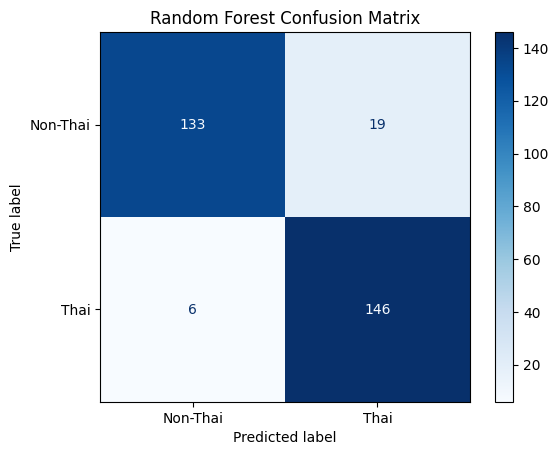

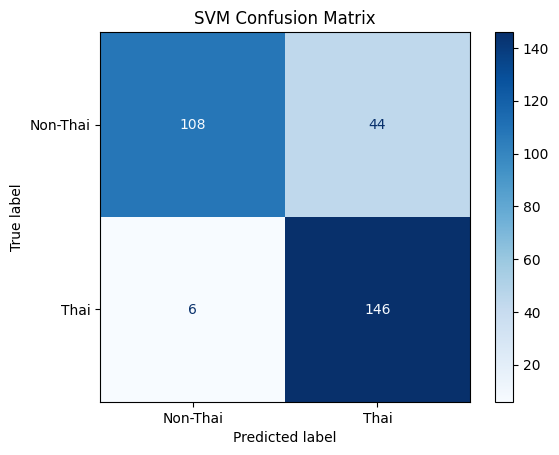

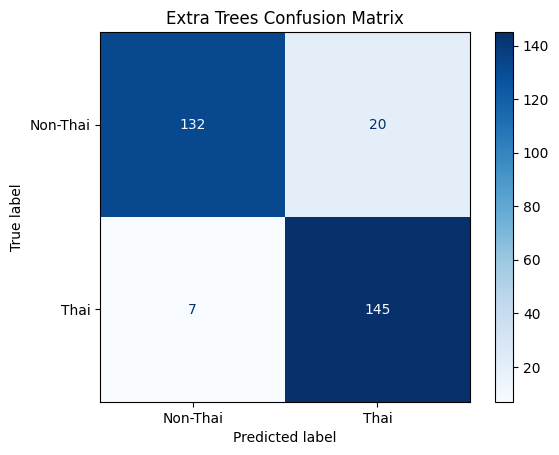

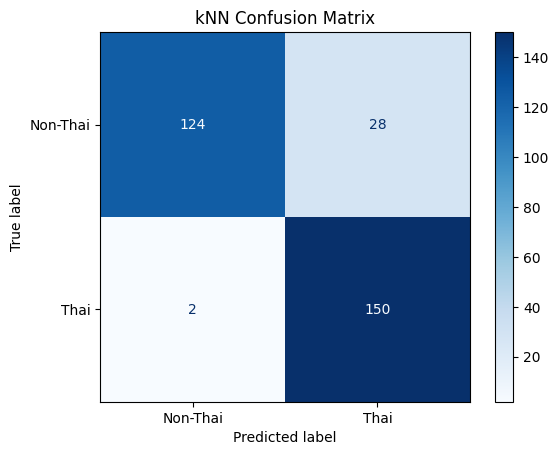

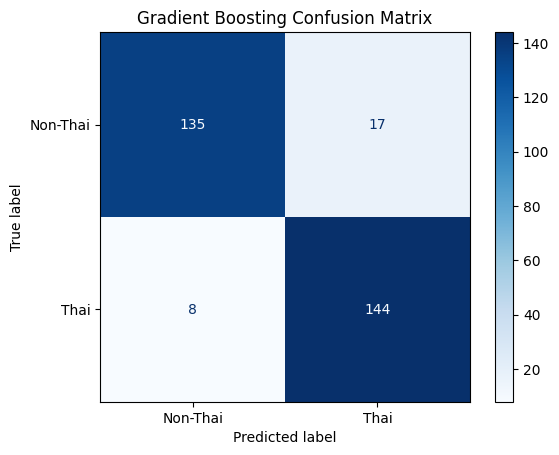

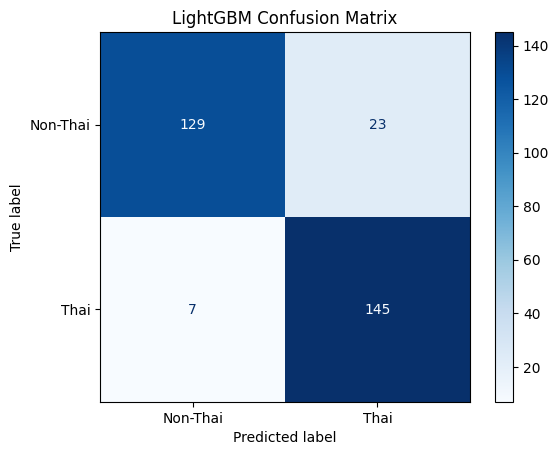

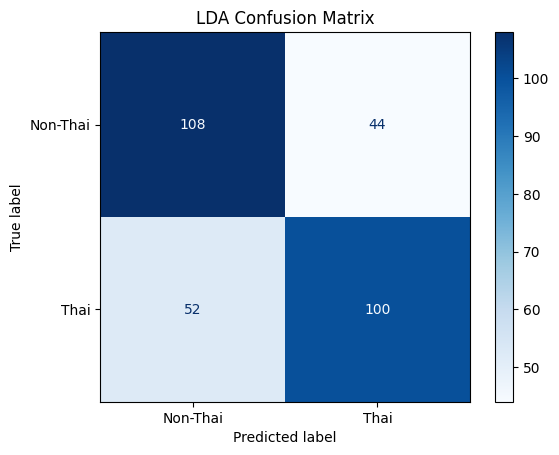

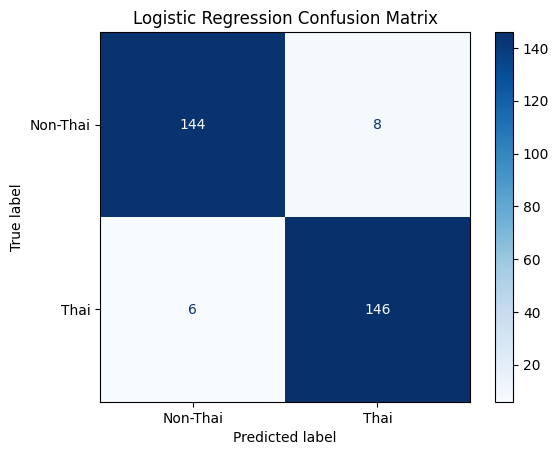

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have the true labels and predictions for each classifier stored in the following variables:
# y_true_rf, y_pred_rf
# y_true_svm, y_pred_svm
# y_true_et, y_pred_et
# y_true_knn, y_pred_knn
# y_true_gbc, y_pred_gbc
# y_true_lgbm, y_pred_lgbm
# y_true_lda, y_pred_lda
# y_true_logreg, y_pred_logreg

# y_true_rf2_all, y_pred_rf2_all
# y_true_svm2_all,  y_pred_svm2_all
# y_true_et_all, y_pred_et_all
# y_true_knn_all, y_pred_knn_all
# y_true_all_gbc, y_pred_all_gbc
# y_true_all_lgbm, y_pred_all_lgbm
# y_true_all_ldar, y_pred_all_ldar_reversed
# y_true_all_logreg, y_pred_lg_flipped

# Define the class labels
class_labels = le.classes_

# Function to display confusion matrix
def display_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Display confusion matrices for each classifier
display_confusion_matrix(y_true_rf2_all, y_pred_rf2_all, 'Random Forest Confusion Matrix')
display_confusion_matrix(y_true_svm2_all,  y_pred_svm2_all, 'SVM Confusion Matrix')
display_confusion_matrix(y_true_et_all, y_pred_et_all, 'Extra Trees Confusion Matrix')
display_confusion_matrix(y_true_knn_all, y_pred_knn_all, 'kNN Confusion Matrix')
display_confusion_matrix(y_true_all_gbc, y_pred_all_gbc, 'Gradient Boosting Confusion Matrix')
display_confusion_matrix(y_true_all_lgbm, y_pred_all_lgbm, 'LightGBM Confusion Matrix')
display_confusion_matrix(y_true_all_ldar, y_pred_all_ldar_reversed, 'LDA Confusion Matrix')
display_confusion_matrix(y_true_all_logreg, y_pred_lg_flipped, 'Logistic Regression Confusion Matrix')


Displaying Confusion Matrices as Text Tables

In [49]:
# Function to display confusion matrix as a text table
def display_confusion_matrix_text(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)
    print(title)
    print(df_cm)
    print()

# Display confusion matrices for each classifier as text tables
display_confusion_matrix_text(y_true_rf2_all, y_pred_rf2_all, 'Random Forest Confusion Matrix')
display_confusion_matrix_text(y_true_svm2_all,  y_pred_svm2_all, 'SVM Confusion Matrix')
display_confusion_matrix_text(y_true_et_all, y_pred_et_all, 'Extra Trees Confusion Matrix')
display_confusion_matrix_text(y_true_knn_all, y_pred_knn_all, 'kNN Confusion Matrix')
display_confusion_matrix_text(y_true_all_gbc, y_pred_all_gbc, 'Gradient Boosting Confusion Matrix')
display_confusion_matrix_text(y_true_all_lgbm, y_pred_all_lgbm, 'LightGBM Confusion Matrix')
display_confusion_matrix_text(y_true_all_ldar, y_pred_all_ldar_reversed, 'LDA Confusion Matrix')
display_confusion_matrix_text(y_true_all_logreg, y_pred_lg_flipped, 'Logistic Regression Confusion Matrix')


Random Forest Confusion Matrix
          Non-Thai  Thai
Non-Thai       133    19
Thai             6   146

SVM Confusion Matrix
          Non-Thai  Thai
Non-Thai       108    44
Thai             6   146

Extra Trees Confusion Matrix
          Non-Thai  Thai
Non-Thai       132    20
Thai             7   145

kNN Confusion Matrix
          Non-Thai  Thai
Non-Thai       124    28
Thai             2   150

Gradient Boosting Confusion Matrix
          Non-Thai  Thai
Non-Thai       135    17
Thai             8   144

LightGBM Confusion Matrix
          Non-Thai  Thai
Non-Thai       129    23
Thai             7   145

LDA Confusion Matrix
          Non-Thai  Thai
Non-Thai       108    44
Thai            52   100

Logistic Regression Confusion Matrix
          Non-Thai  Thai
Non-Thai       144     8
Thai             6   146



Classification Report

In [50]:
from sklearn.metrics import classification_report

# Assuming you have these classification reports stored
# classification_report_rf = ...
# classification_report_svm = ...
# classification_report_et = ...
# classification_report_knn = ...
# classification_report_gbc = ...
# classification_report_lgbm = ...
# classification_report_lda = ...
# classification_report_logreg = ...

# Function to display classification report
def display_classification_report(report, model_name):
    print(f"Classification Report for {model_name}")
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            print(f"Class: {label}")
            for metric_name, score in metrics.items():
                print(f"{metric_name}: {score}")
        else:
            print(f"{label}: {metrics}")
        print()

# Call the function for each classifier
display_classification_report(report_rf_logo, "Random Forest")
display_classification_report(report_svm1_logo, "SVM")
display_classification_report(report_et_logo, "Extra Trees")
display_classification_report(report_knn_logo, "k-Nearest Neighbors")
display_classification_report(report_gbc_logo, "Gradient Boosting Classifier")
display_classification_report(report_lgbm_logo, "LightGBM")
display_classification_report(report_lda_logo_reversed, "Linear Discriminant Analysis")
display_classification_report(report_logreg_flipped, "Logistic Regression")


Classification Report for Random Forest
Class: Non-Thai
precision: 0.9568345323741008
recall: 0.875
f1-score: 0.9140893470790378
support: 152.0

Class: Thai
precision: 0.8848484848484849
recall: 0.9605263157894737
f1-score: 0.9211356466876972
support: 152.0

accuracy: 0.9177631578947368

Class: macro avg
precision: 0.9208415086112929
recall: 0.9177631578947368
f1-score: 0.9176124968833674
support: 304.0

Class: weighted avg
precision: 0.9208415086112927
recall: 0.9177631578947368
f1-score: 0.9176124968833674
support: 304.0

Classification Report for SVM
Class: Non-Thai
precision: 0.9473684210526315
recall: 0.7105263157894737
f1-score: 0.8120300751879699
support: 152.0

Class: Thai
precision: 0.7684210526315789
recall: 0.9605263157894737
f1-score: 0.8538011695906432
support: 152.0

accuracy: 0.8355263157894737

Class: macro avg
precision: 0.8578947368421053
recall: 0.8355263157894737
f1-score: 0.8329156223893066
support: 304.0

Class: weighted avg
precision: 0.8578947368421053
recall: 0

AIO Classifiers

In [51]:
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.model_selection import LeaveOneGroupOut
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# from sklearn.preprocessing import LabelEncoder

# # Define the target variable and feature columns
# target_v0u = 'thnoth_name'
# features_v0u = df_smoothed_v0w.columns.difference(['thnoth_name', 'prov_char'])
# X = df_smoothed_v0w[features_v0u]
# y = df_smoothed_v0w[target_v0u]
# groups = df_smoothed_v0w['prov_char']

# # Encode the target variable
# le = LabelEncoder()
# y_encoded = le.fit_transform(y)

# # Initialize LOGO-CV
# logo = LeaveOneGroupOut()

# # Function to evaluate a classifier using LOGO-CV
# def evaluate_classifier(clf, classifier_name):
#     y_true_all = []
#     y_pred_all = []

#     for train_index, test_index in logo.split(X, y_encoded, groups):
#         X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#         y_train, y_test = y_encoded[train_index], y_encoded[test_index]

#         # Fit the model
#         clf.fit(X_train, y_train)

#         # Predict the test samples
#         y_test_pred = clf.predict(X_test)

#         # Store the prediction and actual value
#         y_true_all.extend(y_test)
#         y_pred_all.extend(y_test_pred)

#     # Calculate the overall accuracy
#     overall_accuracy = accuracy_score(y_true_all, y_pred_all)
#     print(f'Leave-One-Group-Out CV - Overall Test Accuracy for {classifier_name}: {overall_accuracy}')

#     # Generate the classification report for the overall test predictions
#     report = classification_report(y_true_all, y_pred_all, target_names=le.classes_, output_dict=True)
#     print(f"Leave-One-Group-Out CV {classifier_name} Model Classification Report")
#     print(classification_report(y_true_all, y_pred_all, target_names=le.classes_))

#     # Print the confusion matrix in text format
#     conf_matrix = confusion_matrix(y_true_all, y_pred_all)
#     conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
#     print(f"Confusion Matrix for {classifier_name}:")
#     print(conf_matrix_df)

#     # Print the detailed results
#     for class_name, metrics in report.items():
#         if isinstance(metrics, dict):
#             print(f"Class: {class_name}")
#             for metric_name, score in metrics.items():
#                 print(f"{metric_name}: {score}")
#         else:
#             print(f"{class_name}: {metrics}")
#         print()

In [52]:
# # Initialize classifiers
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# svm = SVC(kernel='linear', C=1, random_state=42)
# et = ExtraTreesClassifier(n_estimators=100, random_state=42)
# knn = KNeighborsClassifier(n_neighbors=5)
# gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
# lda = LinearDiscriminantAnalysis()
# logreg = LogisticRegression(random_state=42)

# # Evaluate each classifier
# evaluate_classifier(rf, "Random Forest")
# evaluate_classifier(svm, "SVM")
# evaluate_classifier(et, "Extra Trees")
# evaluate_classifier(knn, "k-Nearest Neighbors")
# evaluate_classifier(gbc, "Gradient Boosting Classifier")
# evaluate_classifier(lda, "Linear Discriminant Analysis")
# evaluate_classifier(logreg, "Logistic Regression")

Leave-One-Group-Out CV - Overall Test Accuracy for Random Forest: 0.9177631578947368
Leave-One-Group-Out CV Random Forest Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.96      0.88      0.91       152
        Thai       0.88      0.96      0.92       152

    accuracy                           0.92       304
   macro avg       0.92      0.92      0.92       304
weighted avg       0.92      0.92      0.92       304

Confusion Matrix for Random Forest:
          Non-Thai  Thai
Non-Thai       133    19
Thai             6   146
Class: Non-Thai
precision: 0.9568345323741008
recall: 0.875
f1-score: 0.9140893470790378
support: 152.0

Class: Thai
precision: 0.8848484848484849
recall: 0.9605263157894737
f1-score: 0.9211356466876972
support: 152.0

accuracy: 0.9177631578947368

Class: macro avg
precision: 0.9208415086112929
recall: 0.9177631578947368
f1-score: 0.9176124968833674
support: 304.0

Class: weighted avg
precision: 0.92084150861

Important Features

RF

      Feature  Importance
720  1697.533    0.025086
721  1698.015    0.021764
710  1692.712    0.017609
711  1693.194    0.015934
700  1687.891    0.015535
702  1688.855    0.015175
697  1686.444    0.015125
708  1691.748    0.015096
714   1694.64    0.014209
717  1696.087    0.014073


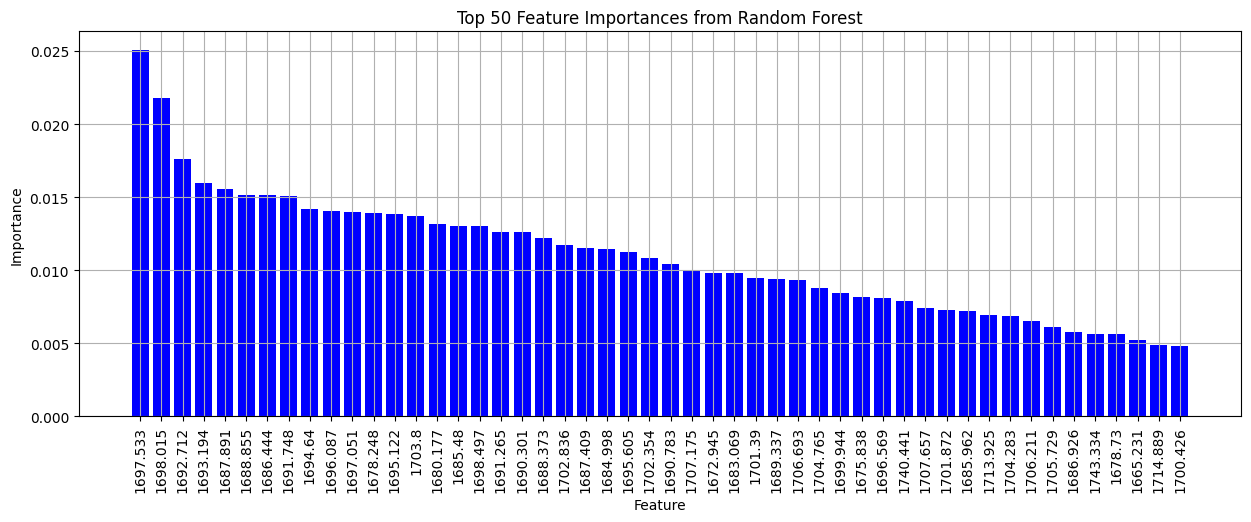

In [59]:
# Extract feature importances
rf_importances = rf.feature_importances_

# Create a DataFrame for feature importances
rf_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_importances
})

# Sort by importance
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(rf_importance_df.head(10))

# Plot the feature importances
plt.figure(figsize=(15, 5))
plt.bar(rf_importance_df['Feature'][:50], rf_importance_df['Importance'][:50], color='blue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 50 Feature Importances from Random Forest')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

ET

Leave-One-Group-Out CV - Overall Test Accuracy: 0.9111842105263158
Leave-One-Group-Out CV Extra Trees Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.95      0.87      0.91       152
        Thai       0.88      0.95      0.91       152

    accuracy                           0.91       304
   macro avg       0.91      0.91      0.91       304
weighted avg       0.91      0.91      0.91       304

Confusion Matrix:
          Non-Thai  Thai
Non-Thai       132    20
Thai             7   145
      Feature  Importance
694  1684.998    0.014388
717  1696.087    0.010724
698  1686.926    0.009766
711  1693.194    0.009239
710  1692.712    0.008533
732  1703.318    0.008360
742   1708.14    0.008248
675  1675.838    0.008098
692  1684.034    0.007977
721  1698.015    0.007866


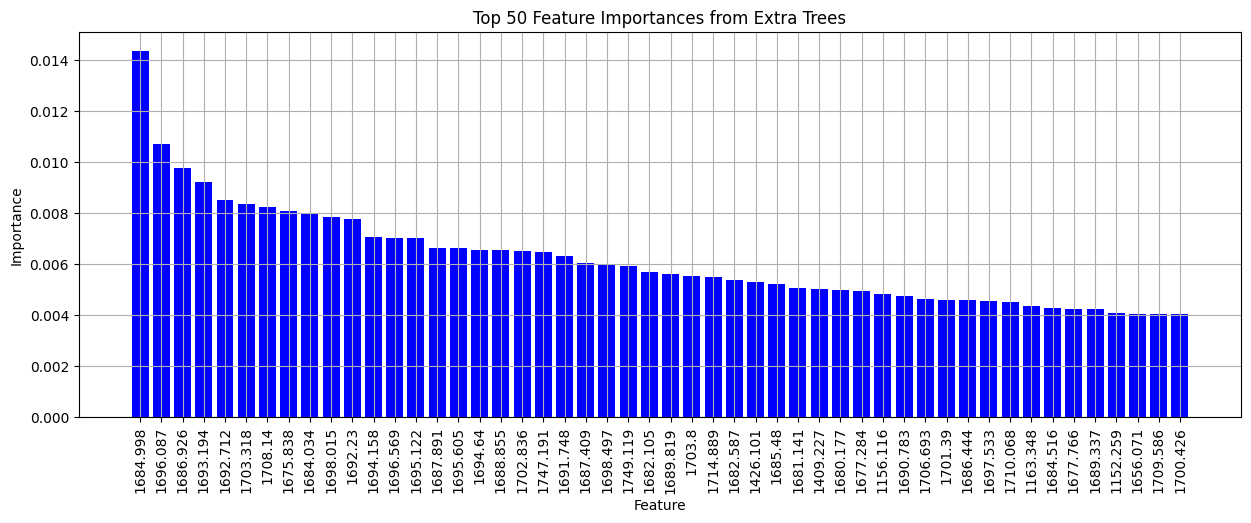

In [60]:
# Extract feature importances
et_importances = et.feature_importances_

# Create a DataFrame for feature importances
et_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': et_importances
})

# Sort by importance
et_importance_df = et_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(et_importance_df.head(10))

# Plot the feature importances
plt.figure(figsize=(15, 5))
plt.bar(et_importance_df['Feature'][:50], et_importance_df['Importance'][:50], color='blue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 50 Feature Importances from Extra Trees')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


GBC

       Feature  Importance
718   1696.569    0.300653
731   1702.836    0.092966
693   1684.516    0.082417
694   1684.998    0.064515
730   1702.354    0.057773
702   1688.855    0.052239
1492  2962.607    0.028999
733     1703.8    0.027230
715   1695.122    0.016761
633   1655.589    0.015968


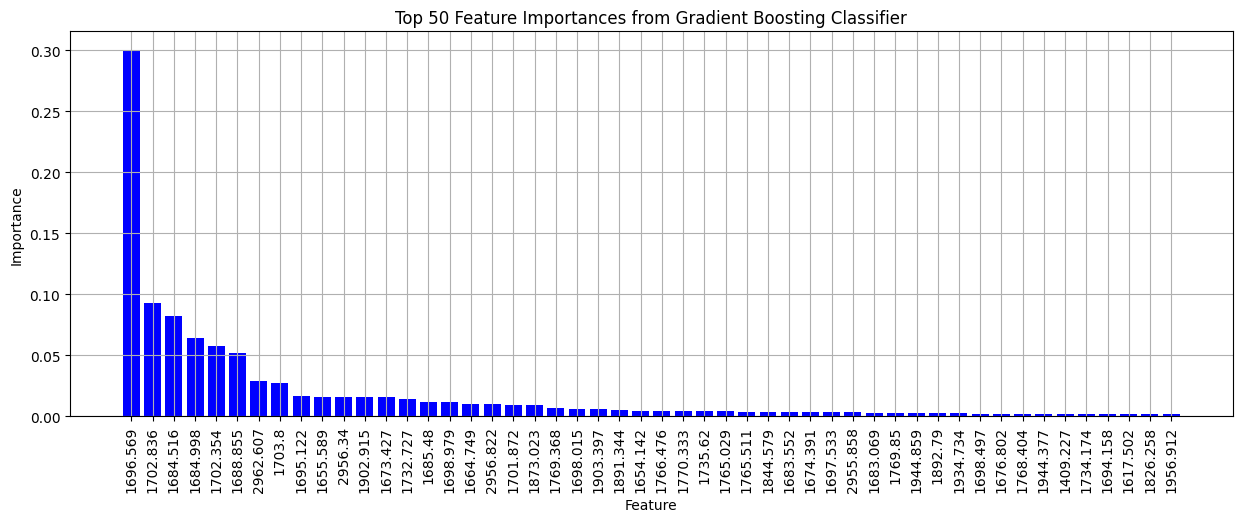

In [63]:
# Extract feature importances
gbc_importances = gbc.feature_importances_

# Create a DataFrame for feature importances
gbc_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gbc_importances
})

# Sort by importance
gbc_importance_df = gbc_importance_df

# Sort by importance
gbc_importance_df = gbc_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(gbc_importance_df.head(10))

# Plot the feature importances
plt.figure(figsize=(15, 5))
plt.bar(gbc_importance_df['Feature'][:50], gbc_importance_df['Importance'][:50], color='blue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 50 Feature Importances from Gradient Boosting Classifier')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

LightGBM (LGBM)

       Feature  Importance
720   1697.533          36
42    1107.422          32
729   1701.872          21
715   1695.122          20
693   1684.516          18
38    1106.458          18
44    1107.904          17
1492  2962.607          16
1480  2956.822          15
695    1685.48          13


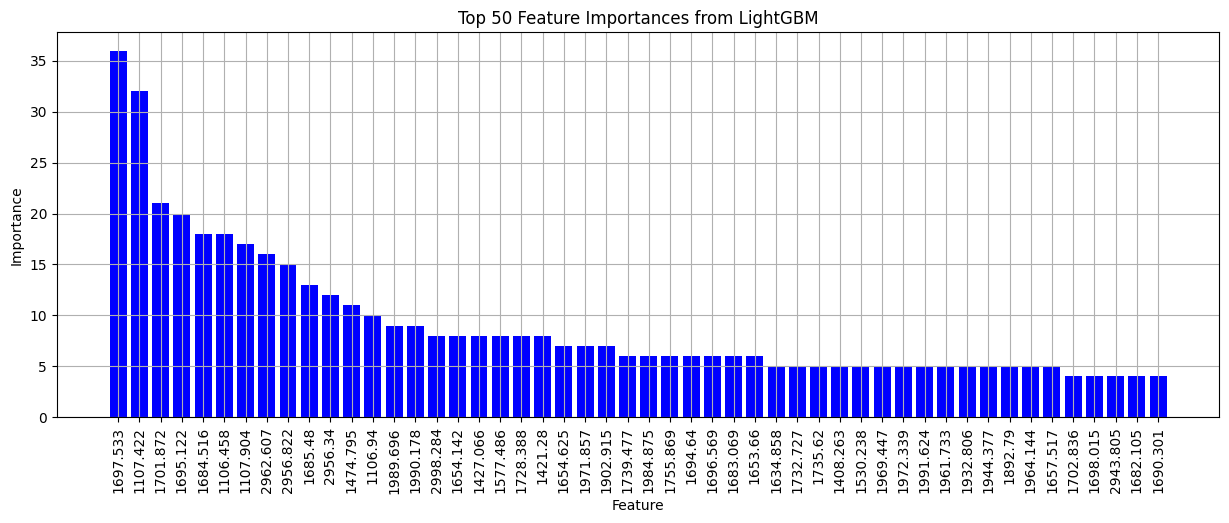

In [64]:
# Extract feature importances
lgbm_importances = model_lgbm.feature_importances_

# Create a DataFrame for feature importances
lgbm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': lgbm_importances
})

# Sort by importance
lgbm_importance_df = lgbm_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(lgbm_importance_df.head(10))

# Plot the feature importances
plt.figure(figsize=(15, 5))
plt.bar(lgbm_importance_df['Feature'][:50], lgbm_importance_df['Importance'][:50], color='blue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 50 Feature Importances from LightGBM')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Linear Discriminant Analysis (LDA)

        Feature       Loading   abs_loading
40      1106.94  1.443799e+32  1.443799e+32
41    1106.94.1  1.443799e+32  1.443799e+32
43   1107.422.1 -1.162237e+32  1.162237e+32
42     1107.422 -1.162237e+32  1.162237e+32
45   1107.904.1 -1.082523e+32  1.082523e+32
44     1107.904 -1.082523e+32  1.082523e+32
38     1106.458  9.274190e+31  9.274190e+31
39   1106.458.1  9.274190e+31  9.274190e+31
516    1599.181 -5.013825e+05  5.013825e+05
515    1598.699 -4.523882e+05  4.523882e+05


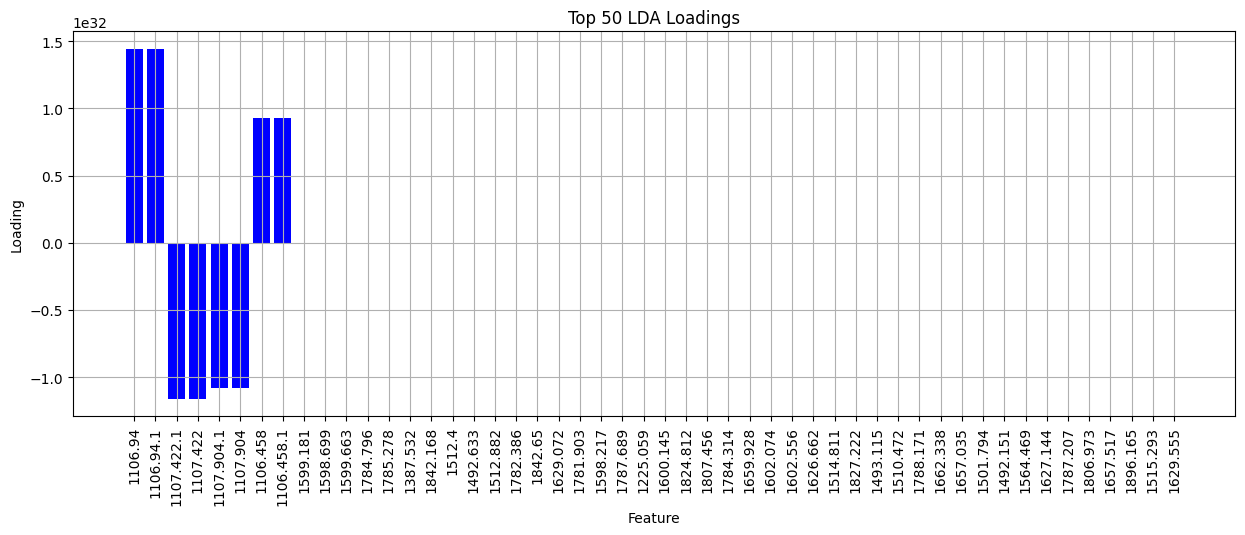

In [66]:
# Extract LDA loadings
lda_loadings = model_lda.scalings_

# Create a DataFrame for LDA loadings
lda_loadings_df = pd.DataFrame({
    'Feature': X.columns,
    'Loading': lda_loadings.flatten()
})

# Sort by loading magnitude
lda_loadings_df['abs_loading'] = lda_loadings_df['Loading'].abs()
lda_loadings_df = lda_loadings_df.sort_values(by='abs_loading', ascending=False)

# Display the top features
print(lda_loadings_df.head(10))

# Plot the LDA loadings
plt.figure(figsize=(15, 5))
plt.bar(lda_loadings_df['Feature'][:50], lda_loadings_df['Loading'][:50], color='blue')
plt.xlabel('Feature')
plt.ylabel('Loading')
plt.title('Top 50 LDA Loadings')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


Logistic Regression

         Feature  Coefficient  abs_coef
39    1106.458.1    -0.494754  0.494754
38      1106.458    -0.494754  0.494754
40       1106.94     0.468545  0.468545
41     1106.94.1     0.468545  0.468545
63      1116.582     0.309812  0.309812
64      1117.064     0.306349  0.306349
62        1116.1     0.287928  0.287928
65      1117.547     0.279044  0.279044
1123    1891.826     0.256256  0.256256
61      1115.618     0.243391  0.243391


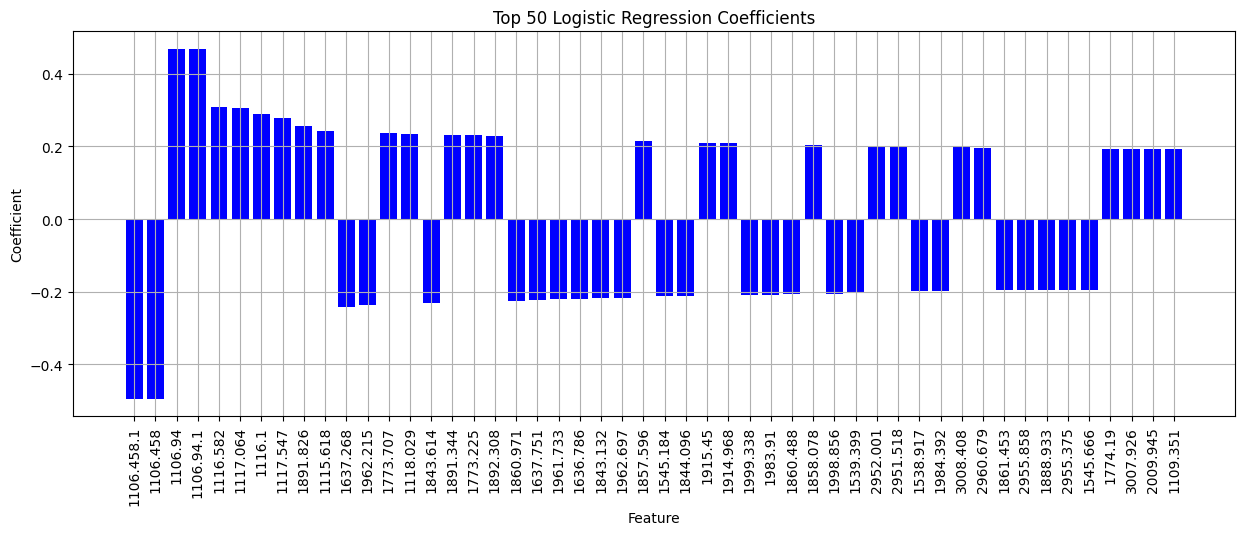

In [67]:
# Extract Logistic Regression coefficients
logreg_coefs = logreg_model.coef_.flatten()

# Create a DataFrame for Logistic Regression coefficients
logreg_coefs_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg_coefs
})

# Sort by coefficient magnitude
logreg_coefs_df['abs_coef'] = logreg_coefs_df['Coefficient'].abs()
logreg_coefs_df = logreg_coefs_df.sort_values(by='abs_coef', ascending=False)

# Display the top features
print(logreg_coefs_df.head(10))

# Plot the Logistic Regression coefficients
plt.figure(figsize=(15, 5))
plt.bar(logreg_coefs_df['Feature'][:50], logreg_coefs_df['Coefficient'][:50], color='blue')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Top 50 Logistic Regression Coefficients')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [ ]:
logreg_coefs_df

SVM

In [69]:
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the SVM classifier
svm = SVC(kernel='rbf', random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_svm_all = []
y_pred_svm_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X_scaled, y_encoded, groups):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    svm.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = svm.predict(X_test)
    
    # Store the prediction and actual value
    y_true_svm_all.extend(y_test)
    y_pred_svm_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_svm_all, y_pred_svm_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_svm_logo = classification_report(y_true_svm_all, y_pred_svm_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV SVM Model Classification Report")
print(classification_report(y_true_svm_all, y_pred_svm_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_svm_all, y_pred_svm_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)


Leave-One-Group-Out CV - Overall Test Accuracy: 0.8355263157894737
Leave-One-Group-Out CV SVM Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.95      0.71      0.81       152
        Thai       0.77      0.96      0.85       152

    accuracy                           0.84       304
   macro avg       0.86      0.84      0.83       304
weighted avg       0.86      0.84      0.83       304

Confusion Matrix:
          Non-Thai  Thai
Non-Thai       108    44
Thai             6   146


In [70]:
from sklearn.inspection import permutation_importance

# Calculate permutation importances on the test set
perm_importance = permutation_importance(svm, X_scaled, y_encoded, n_repeats=10, random_state=42, n_jobs=-1)

# Create a DataFrame for permutation importances
svm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
})

# Sort by importance
svm_importance_df = svm_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(svm_importance_df.head(10))


        Feature  Importance
38     1106.458    0.001316
43   1107.422.1    0.001316
40      1106.94    0.001316
41    1106.94.1    0.001316
42     1107.422    0.001316
39   1106.458.1    0.001316
44     1107.904    0.000987
45   1107.904.1    0.000987
782    1727.424    0.000987
783    1727.906    0.000987


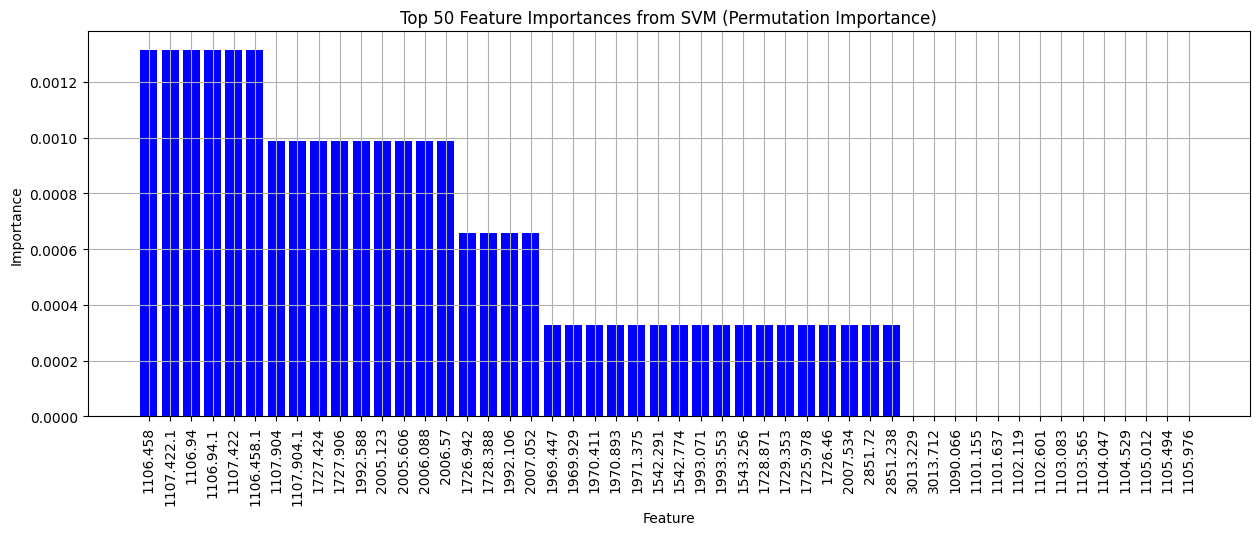

In [71]:
import matplotlib.pyplot as plt

# Plot the feature importances
plt.figure(figsize=(15, 5))
plt.bar(svm_importance_df['Feature'][:50], svm_importance_df['Importance'][:50], color='blue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 50 Feature Importances from SVM (Permutation Importance)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
